In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist, tokenize

In [2]:
train = pd.read_csv('data/train_data.csv')
train_labels = pd.read_csv('data/train_labels.csv')
test = pd.read_csv('data/test_data.csv')

In [3]:
# Merge train_labels into train_data
train = train.drop('is_duplicate', axis=1)
train = train.merge(train_labels, how='inner', on='id')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323164 entries, 0 to 323163
Data columns (total 4 columns):
id              323164 non-null int64
question1       323163 non-null object
question2       323161 non-null object
is_duplicate    323164 non-null int64
dtypes: int64(2), object(2)
memory usage: 12.3+ MB


In [5]:
train.head()

,id,question1,question2,is_duplicate
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


The dataset consists of 3 columns:
- question1, question2: the text contents of each question.
- is_duplicate: the prediction label

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81126 entries, 0 to 81125
Data columns (total 3 columns):
test_id      81126 non-null int64
question1    81126 non-null object
question2    81126 non-null object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [7]:
test.head()

,test_id,question1,question2
0,15,What would a Trump presidency mean for current...,How will a Trump presidency affect the student...
1,20,Why do rockets look white?,Why are rockets and boosters painted white?
2,21,What's causing someone to be jealous?,What can I do to avoid being jealous of someone?
3,23,How much is 30 kV in HP?,Where can I find a conversion chart for CC to ...
4,34,What is the best travel website in spain?,What is the best travel website?


In [9]:
print('Train size: ', len(train))
print('Test size: ', len(test))
print('Fraction of positive classifications: ', round(train.is_duplicate.mean(), 2))

Train size:  323164
Test size:  81126
Fraction of positive classifications:  0.37


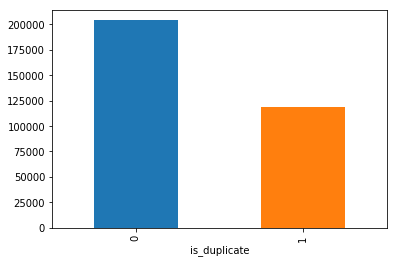

In [10]:
train.groupby('is_duplicate')['id'].count().plot.bar()

### WordCloud - Train Set

In [11]:
text_series = pd.Series(train['question1'].tolist() + train['question2'].tolist()).astype(str)
text = ' '.join(text_series)

(-0.5, 399.5, 199.5, -0.5)

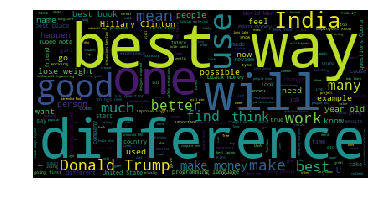

In [12]:
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')

## WordCloud - Test Set

In [17]:
text_series_test = pd.Series(test['question1'].tolist() + test['question2'].tolist()).astype(str)
text_test = ' '.join(text_series_test)

(-0.5, 399.5, 199.5, -0.5)

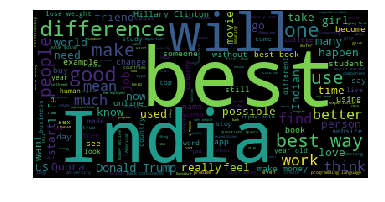

In [18]:
wordcloud_test = WordCloud().generate(text_test)

plt.imshow(wordcloud_test)
plt.axis('off')

## Word Count Distribution

In [23]:
wordcount_train = text_series.apply(lambda q: len(q.split(' ')))
wordcount_test = text_series_test.apply(lambda q: len(q.split(' ')))

(array([0.00663733, 0.09267092, 0.06245488, 0.02197059, 0.00909332,
        0.00489593, 0.00136128, 0.00055784, 0.00020857, 0.00014933]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 10 Patch objects>)

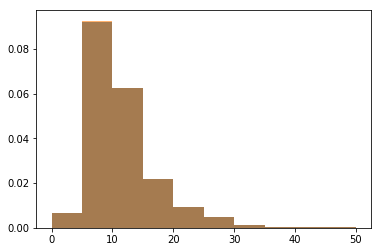

In [41]:
plt.hist(wordcount_train, range=(0, 50), density=True)
plt.hist(wordcount_test, range=(0, 50), density=True, alpha=0.6)